# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Introdução à Inteligência Artificial</font>

## Convolutional Neural Network e Tensorflow

CNNs são um tipo especial de rede neural que usa cópias idênticas do mesmo neurônio. Essas cópias incluem os mesmos parâmetros (pesos e bias compartilhados) e funções de ativação.

Em uma camada totalmente conectada cada neurônio é conectado a cada neurônio na camada anterior e cada conexão tem seu próprio peso. Este é um padrão de conexão de propósito geral e não faz suposições sobre as features nos dados de entrada, portanto, não usando qualquer vantagem que o conhecimento dos dados que estão sendo usados pode trazer. Estes tipos de camadas também são muito custosos em termos de memória e computação.

Em contraste, em uma camada convolucional cada neurônio é conectado somente a alguns neurônios locais próximos na camada precedente e o mesmo conjunto de pesos é usado para cada neurônio. No entanto, seu comportamento tem um custo, este padrão de conexão só faz sentido para os casos em que os dados podem ser interpretados como espaciais, com as características a serem extraídas sendo espacialmente locais. É igualmente provável que ocorra em qualquer posição de entrada (daí os mesmos pesos em todas as posições)

A grande vantagem das CNNs é que elas são boas em encontrar recursos nas imagens que crescem após cada nível, resultando em recursos de alto nível no final. As camadas finais (podem ser uma ou mais) usam todos esses recursos gerados para classificação ou regressão. Basicamente, as Redes Neurais Convolucionais são excelente para fazer automaticamente a Engenharia de Recursos (Feature Learning) sem perder muito tempo criando seus próprios códigos e sem necessidade de experiência no campo da Engenharia de Recursos.

ATENÇÃO: Este jupyter notebook pode ser executado com TensorFlow versões 1.x ou 2.x. 

- Se for executar em TensorFlow 2.x, nenhuma ação precisa ser tomada. É só executar as células abaixo.
- Se for executar em TensorFlow 1.x, basta remover o sufixo tf.compat.v1 e substituir por tf.

## Usando TensorFlow

In [1]:
!pip install tensorflow==2.1.0

In [2]:
import os
import tensorflow as tf
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [3]:
# Para executar este notebook na versão TensorFlow 1.x, comente a linha abaixo.
tf.compat.v1.disable_eager_execution()

In [4]:
# Construindo o Grafo
input = tf.Variable(tf.compat.v1.random_normal([1,10,10,1]))
filter = tf.Variable(tf.compat.v1.random_normal([3,3,1,1]))

In [5]:
op = tf.nn.conv2d(input, filter, strides = [1, 1, 1, 1], padding = 'VALID')
op2 = tf.nn.conv2d(input, filter, strides = [1, 1, 1, 1], padding = 'SAME')

In [6]:
# Incialização e sessão
init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filtro/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Feature Map \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Feature Map com padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[-9.1286413e-02]
   [-3.7892333e-01]
   [ 8.9995183e-02]
   [-5.2616656e-01]
   [-1.7301735e-01]
   [-1.3580085e-01]
   [ 4.6241379e-01]
   [-7.2902489e-01]
   [-5.6928903e-01]
   [ 9.8594481e-01]]

  [[ 3.8933474e-01]
   [-5.7096934e-01]
   [-1.2670441e+00]
   [-7.3084392e-02]
   [-7.0015675e-01]
   [-9.5180744e-01]
   [-1.6876502e-01]
   [-1.1911104e+00]
   [ 7.1569377e-01]
   [ 2.7393878e-01]]

  [[ 4.3395784e-01]
   [-2.5784087e-01]
   [ 9.5080130e-02]
   [ 5.2488458e-01]
   [ 3.3514810e-01]
   [ 3.0429564e+00]
   [ 8.4646803e-01]
   [-5.2284056e-01]
   [ 4.4192719e-01]
   [ 3.2709658e-02]]

  [[-2.7388257e-01]
   [ 4.0447408e-01]
   [-2.2876143e+00]
   [ 1.1081971e+00]
   [ 8.3125472e-02]
   [ 1.6223127e-02]
   [ 6.4973556e-02]
   [-5.7835186e-01]
   [ 6.2836540e-01]
   [ 4.0619370e-01]]

  [[ 1.9200057e-01]
   [ 1.3573624e-01]
   [-9.5496839e-01]
   [ 9.7583610e-01]
   [-2.0877503e-01]
   [ 5.7267624e-01]
   [ 2.5276873e-01]
   [ 6.4897454e-01]
   [ 1.4673777e+00]
   [

## Aplicando a Convolução a Imagens

In [7]:
# Importando os pacotes
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [8]:
# Carregando a imagem
img = Image.open("passaro.jpg")  

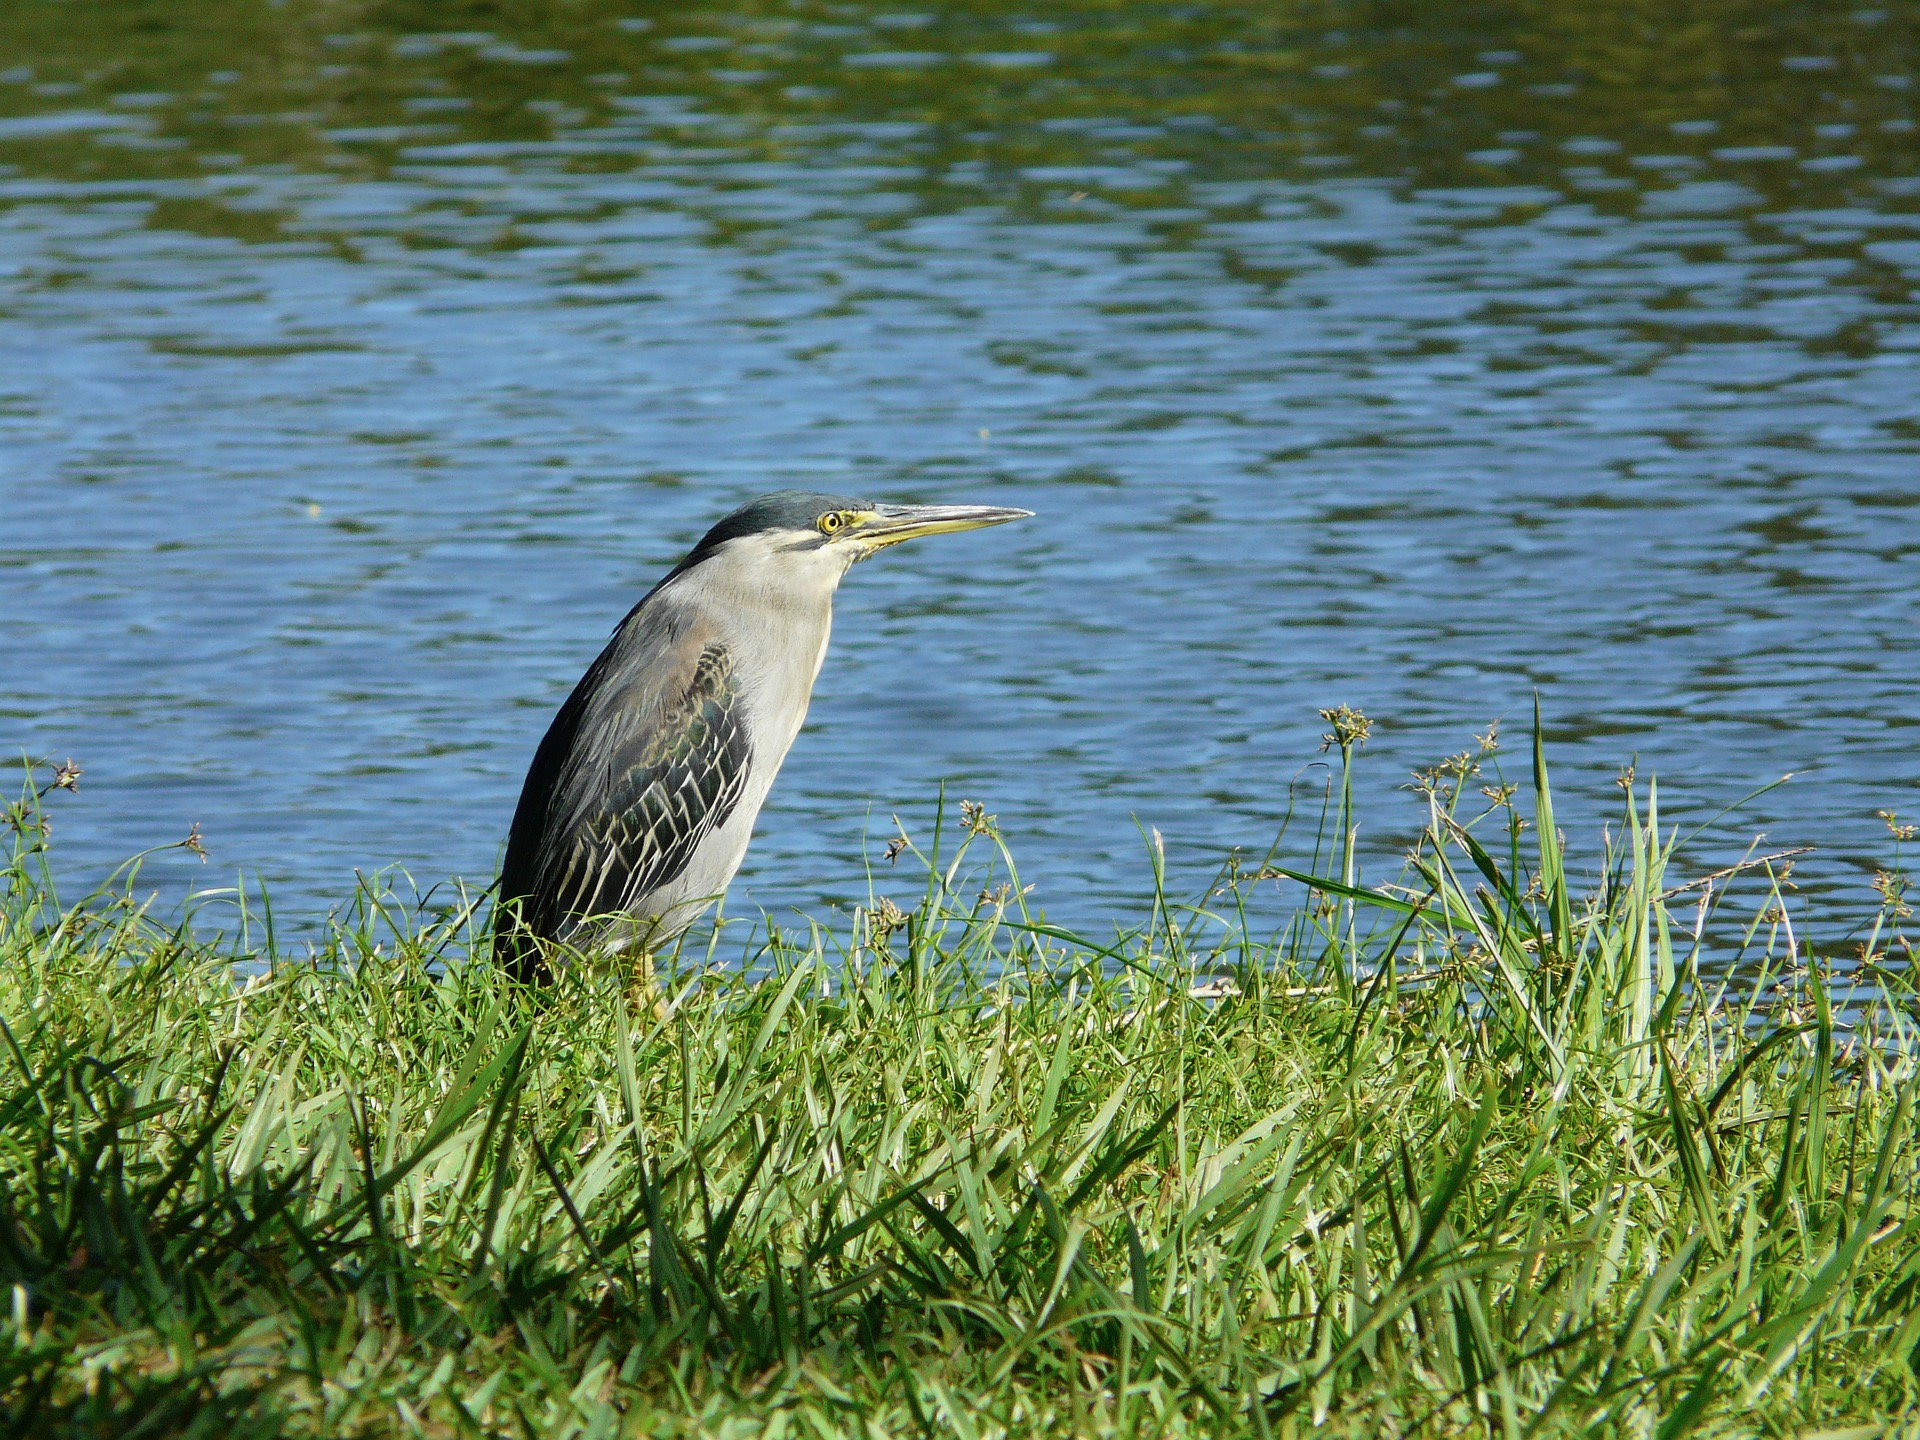

In [9]:
img


 Tipo Original: <PIL.Image.Image image mode=L size=1920x1440 at 0x7FCCC8CB9190> 


Representação Numérica Após Conversão: 

 array([[ 62,  68,  61, ...,  48,  45,  45],
       [ 66,  67,  60, ...,  52,  50,  47],
       [ 62,  65,  63, ...,  51,  48,  52],
       ...,
       [ 20,  22,  23, ..., 177, 163, 148],
       [ 18,  21,  26, ..., 172, 160, 146],
       [ 26,  21,  20, ..., 163, 153, 143]], dtype=uint8)

 Imagem convertida para gray scale: 



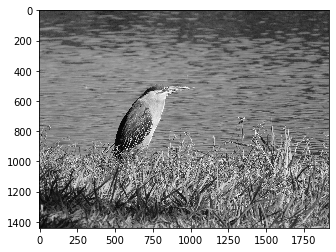

In [10]:
# Convertendo a imagem para grey-scale
image_gr = img.convert("L")    
print("\n Tipo Original: %r \n\n" % image_gr)

# Convertendo a imagem em uma matriz com valores de 0 a 255
arr = np.asarray(image_gr) 
print("Representação Numérica Após Conversão: \n\n %r" % arr) 


# Plot 
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  
print("\n Imagem convertida para gray scale: \n")
plt.show(imgplot)

In [11]:
# Usando um kernel para detecção dos edges
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 

In [12]:
grad = signal.convolve2d(arr, kernel, mode = 'same', boundary = 'symm')

In [13]:
?signal.convolve2d

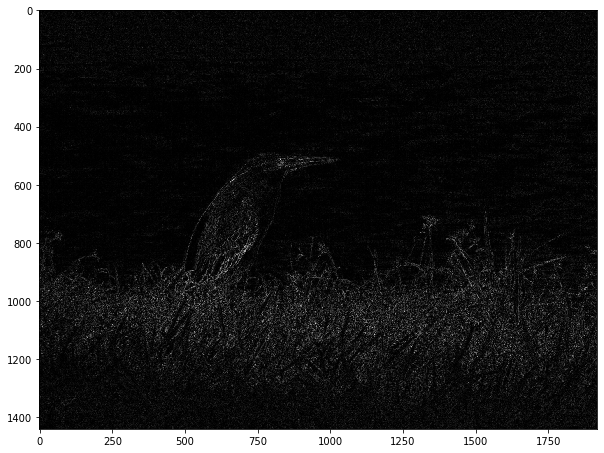

In [14]:
# Imprimindo o resultado
fig, aux = plt.subplots(figsize = (10, 10))
aux.imshow(np.absolute(grad), cmap = 'gray')

Se mudarmos o kernel e começarmos a analisar as saídas, estaríamos agindo como uma CNN. A diferença é que uma rede neural faz todo este trabalho automaticamente (o ajuste do kernel usando pesos diferentes). Além disso, podemos entender como os "biases" afetam o comportamento dos mapas de recursos (feature maps). Quando estivermos trabalhando com aplicações reais de CNNs, você normalmente converte os valores de pixels para um intervalo de 0 a 1. Esse processo é chamado de normalização.

In [15]:
# Ajustando a imagem
grad_biases = np.absolute(grad) + 100
grad_biases[grad_biases > 255] = 255

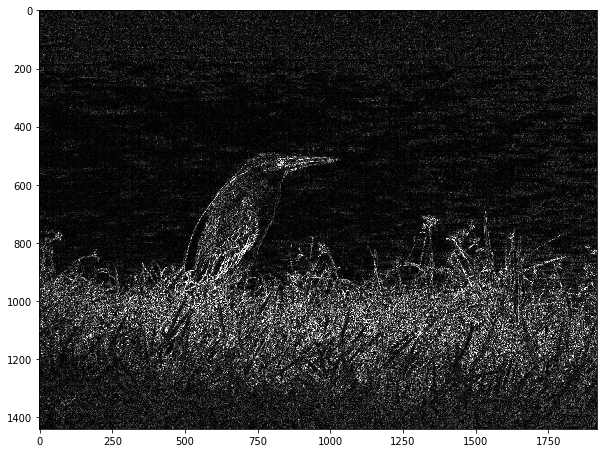

In [16]:
# Plot
fig, aux = plt.subplots(figsize = (10, 10))
aux.imshow(np.absolute(grad_biases), cmap = 'gray')

### Fim